In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from utils.utils_stylegan2 import convert_images_to_uint8

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_visible_devices(gpus[1], 'GPU')
    except RuntimeError as e:
        print(e)

In [3]:
impl = 'ref'
gpu = True 

In [4]:
from stylegan2_generator import StyleGan2Generator

In [180]:
weights_name = 'cat' # face model trained by Nvidia

# instantiating generator network
generator = StyleGan2Generator(weights=weights_name, impl=impl, gpu=gpu)

# loading w average
w_average = np.load('weights/{}_dlatent_avg.npy'.format(weights_name))

Loaded cat generator weights!


In [6]:
from PIL import Image
def load_image(image_file):
    image_file = Image.fromarray(image_file)
    image_file = image_file.resize((224,224))
    
    return np.array(image_file, dtype=np.uint8)

In [7]:
from PIL import Image
def save_image(image_file,name):
    image_file = Image.fromarray(image_file)
    #image_file = image_file.resize((256,256))
    im1 = image_file.save(name)

(-0.5, 511.5, 383.5, -0.5)

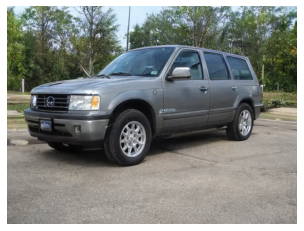

In [239]:
%matplotlib inline
seed = 105
rnd = np.random.RandomState(seed)
z = rnd.randn(1, 512).astype('float32')
#z = np.random.rand(1,512)
dlatents = generator.mapping_network(z)
dlatents = w_average + (dlatents - w_average) * 0.5
out = generator.synthesis_network(dlatents)
img = convert_images_to_uint8(out, nchw_to_nhwc=True, uint8_cast=True)
img = img.numpy()[0][64:448]
#img = load_image(img)
plt.imshow(img)
plt.axis('off')

In [8]:
import numpy as np
from PIL import Image
from cv2 import resize
import tensorflow as tf
import multiprocessing as mp
import pandas as pd
#import matplotlib.pyplot as plt
import os
#import seaborn as sns
import csv
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Activation
from tensorflow.keras.models import Model, Sequential



def euclidean_distance_loss(y_true, y_pred):
    return tf.math.sqrt(tf.math.reduce_sum(tf.math.square(y_pred - y_true), axis=-1))

#assessor_1 = tf.keras.models.load_model('/home/myounes9/FaceGeneration/resnet/epoch_28.h5', custom_objects={'euclidean_distance_loss': euclidean_distance_loss})
#assessor_2 = tf.keras.models.load_model('/home/myounes9/FaceGeneration/senet/epoch_19.h5', custom_objects={'euclidean_distance_loss': euclidean_distance_loss})
#assessor_3 = tf.keras.models.load_model('/home/myounes9/FaceGeneration/stylegan/vgg_epoch_18.h5', custom_objects={'euclidean_distance_loss': euclidean_distance_loss})
#assessor_3 = tf.keras.models.load_model('vgg_epoch_18.h5', custom_objects={'euclidean_distance_loss': euclidean_distance_loss})
#assessor_2 = tf.keras.models.load_model('epoch_17.h5', custom_objects={'euclidean_distance_loss': euclidean_distance_loss})
#assessor_3 = tf.keras.models.load_model('vgg_epoch_7.h5', custom_objects={'euclidean_distance_loss': euclidean_distance_loss})
assessor_1 = tf.keras.models.load_model("/home/myounes9/epoch_6.h5", custom_objects={'euclidean_distance_loss': euclidean_distance_loss})
#assessor_2 = tf.keras.models.load_model("/home/myounes9/FaceGeneration/memvgg/epoch_19.h5", custom_objects={'euclidean_distance_loss': euclidean_distance_loss})
#assessor_3 = tf.keras.models.load_model("/imaging/myounesi/all_models/hf/resvgg/epoch_16.h5", custom_objects={'euclidean_distance_loss': euclidean_distance_loss})
#assessor_4 = tf.keras.models.load_model("/home/myounes9/FaceGeneration/stylegan/senvgg_epoch_17.h5", custom_objects={'euclidean_distance_loss': euclidean_distance_loss})

In [22]:
assessor_1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

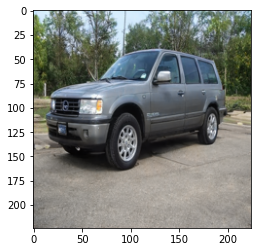

In [23]:
img = load_image(img)
plt.imshow(img)

In [24]:
img = img.reshape((1,224,224,3))
print(assessor_1.predict(img)[0])

2021-11-10 15:27:43.907064: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-11-10 15:27:43.934747: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 3700115000 Hz


[0.76578474]


In [295]:
mems_1 = []
lats =[]

In [13]:
for i in range(100000):
    rnd = np.random.RandomState(i)
    z = rnd.randn(1, 512).astype('float32')
    #lats.append(z)
    dlatents = generator.mapping_network(z)
    dlatents = w_average + (dlatents - w_average) * 0.5
    out = generator.synthesis_network(dlatents)
    img = convert_images_to_uint8(out, nchw_to_nhwc=True, uint8_cast=True)
    img = img.numpy()[0]
    save_image(img,"/imaging-beast/myounesi/church_samples/"+str(i)+".png")
    #img1 = load_image(img)
    #img1 = img1.reshape((1,224,224,3))
    #mems_1.append(assessor_1.predict(img1)[0])

    if i%1000 == 0:
        print(i)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000


In [297]:
#np.save('mems_churches.npy', mems_1)
np.save('lats_cats_512.npy', lats)

In [13]:
mem_cat = np.load('mems_horses.npy')
mem_cat.shape

(75000, 1)

In [14]:
mems_1 = np.array(mems_1)
mems_1.shape

(25000, 1)

In [15]:
mem_cat = np.vstack((mem_cat,mems_1))
mem_cat.shape

(100000, 1)

In [16]:
np.save('mems_horses.npy', mem_cat)

/home/myounes9/.conda/envs/tfg25/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

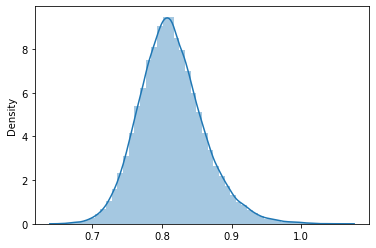

In [215]:
import seaborn as sns

sns.distplot(mems_1)

In [298]:
mems_aug_style = [(w_average + (generator.mapping_network(x) - w_average) * 0.5) for x in lats]

In [299]:
np.save('lats_aug_cats.npy', mems_aug_style)

In [205]:
mean_1 = np.mean(mems_1)
y_1 = np.ones_like(mems_1)
y_1[mems_1<mean_1] = 0

In [300]:
mems_aug_style = np.array(mems_aug_style)
mems_aug_style.shape

(100000, 1, 14, 512)

In [301]:
lats = np.array(lats)
lats.shape

(100000, 1, 512)

In [302]:
lats = lats.reshape((100000,512))
print(lats.shape)

(100000, 512)


In [21]:
lat_cats = np.load('lats_horses_512.npy')
lat_cats = np.vstack((lat_cats,lats))
lat_cats.shape

(100000, 512)

In [22]:
np.save('lats_cats_512.npy', lat_cats)

In [303]:
np.save('lats_cats_512.npy', lats)

In [304]:
mems_aug_style = np.array([np.ravel(x) for x in mems_aug_style])
print(mems_aug_style.shape)

(100000, 7168)


In [24]:
mems_aug_cats = np.load('lats_aug_horses.npy')
mems_aug_cats = np.vstack((mems_aug_cats,mems_aug_style))
mems_aug_cats.shape

(100000, 7168)

In [25]:
np.save('lats_aug_horses.npy', mems_aug_cats)

In [305]:
np.save('lats_aug_cats.npy', mems_aug_style)

In [146]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_1, y_test_1 = train_test_split(lats, y_1, test_size=0.1, random_state=42)

In [147]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=4000, verbose=1).fit(X_train, y_train_1)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          513     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.67874D+04    |proj g|=  3.41196D+03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches


/home/myounes9/.conda/envs/tfg25/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  513      7      8      1     0     0   1.294D-02   3.525D+04
  F =   35248.707059957378     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [98]:
from sklearn import metrics

pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test_1, pred))

Accuracy: 0.7628


In [124]:
#horse
pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test_1, pred))

Accuracy: 0.8217333333333333


In [148]:
#horse 512
pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test_1, pred))

Accuracy: 0.744


In [149]:
w = clf.coef_[0]
#np.save('w_aug_horses.npy', w)

[0.74648917]


(-0.5, 511.5, 383.5, -0.5)

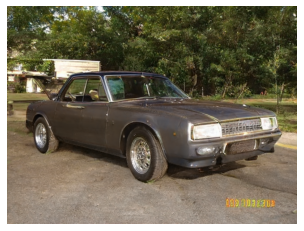

In [77]:
x = X_train[1000].copy()
x = x.reshape((1,16,512))
out = generator.synthesis_network(x)
img = convert_images_to_uint8(out, nchw_to_nhwc=True, uint8_cast=True)
img = img.numpy()[0][64:448]
sample = load_image(img)
sample = sample.reshape((1,224,224,3))
x = assessor_1.predict(sample)[0]
print(x)
#img = load_image(img)
plt.imshow(img)
plt.axis('off')

[0.81839377]


(-0.5, 511.5, 383.5, -0.5)

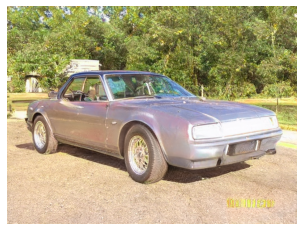

In [80]:
x = X_train[1000].copy() + 12 * w
x = x.reshape((1,16,512))
out = generator.synthesis_network(x)
img = convert_images_to_uint8(out, nchw_to_nhwc=True, uint8_cast=True)
img = img.numpy()[0][64:448]
sample = load_image(img)
sample = sample.reshape((1,224,224,3))
x = assessor_1.predict(sample)[0]
print(x)
#img = load_image(img)
plt.imshow(img)
plt.axis('off')

[0.76601136]


(-0.5, 255.5, 255.5, -0.5)

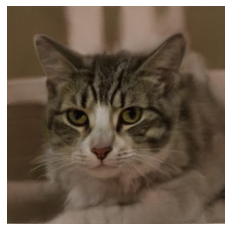

In [102]:
x = X_train[500].copy()
x = x.reshape((1,14,512))
out = generator.synthesis_network(x)
img = convert_images_to_uint8(out, nchw_to_nhwc=True, uint8_cast=True)
img = img.numpy()[0]
sample = load_image(img)
sample = sample.reshape((1,224,224,3))
x = assessor_1.predict(sample)[0]
print(x)
#img = load_image(img)
plt.imshow(img)
plt.axis('off')

[0.84417325]


(-0.5, 255.5, 255.5, -0.5)

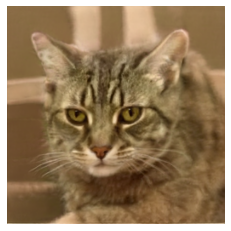

In [107]:
x = X_train[500].copy() + 10 * w
x = x.reshape((1,14,512))
out = generator.synthesis_network(x)
img = convert_images_to_uint8(out, nchw_to_nhwc=True, uint8_cast=True)
img = img.numpy()[0]
sample = load_image(img)
sample = sample.reshape((1,224,224,3))
x = assessor_1.predict(sample)[0]
print(x)
#img = load_image(img)
plt.imshow(img)
plt.axis('off')

[0.6885516]


(-0.5, 255.5, 255.5, -0.5)

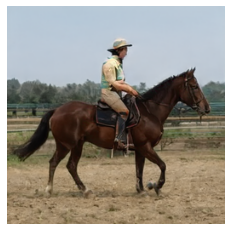

In [142]:
x = X_train[900].copy()
x = x.reshape((1,14,512))
out = generator.synthesis_network(x)
img = convert_images_to_uint8(out, nchw_to_nhwc=True, uint8_cast=True)
img = img.numpy()[0]
sample = load_image(img)
sample = sample.reshape((1,224,224,3))
x = assessor_1.predict(sample)[0]
print(x)
#img = load_image(img)
plt.imshow(img)
plt.axis('off')

[0.6814692]


(-0.5, 255.5, 255.5, -0.5)

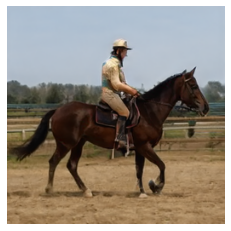

In [145]:
x = X_train[900].copy() - 15 * w
x = x.reshape((1,14,512))
out = generator.synthesis_network(x)
img = convert_images_to_uint8(out, nchw_to_nhwc=True, uint8_cast=True)
img = img.numpy()[0]
sample = load_image(img)
sample = sample.reshape((1,224,224,3))
x = assessor_1.predict(sample)[0]
print(x)
#img = load_image(img)
plt.imshow(img)
plt.axis('off')

[0.73671055]


(-0.5, 255.5, 255.5, -0.5)

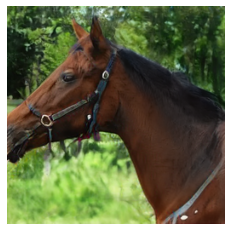

In [190]:
x = X_train[8979].copy()
x = x.reshape((1,512))
out = generator(x)
img = convert_images_to_uint8(out, nchw_to_nhwc=True, uint8_cast=True)
img = img.numpy()[0]
sample = load_image(img)
sample = sample.reshape((1,224,224,3))
x = assessor_1.predict(sample)[0]
print(x)
#img = load_image(img)
plt.imshow(img)
plt.axis('off')

[0.77005166]


(-0.5, 255.5, 255.5, -0.5)

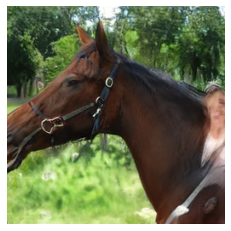

In [196]:
x = X_train[8979].copy() - 0.2 * w
x = x.reshape((1,512))
out = generator(x)
img = convert_images_to_uint8(out, nchw_to_nhwc=True, uint8_cast=True)
img = img.numpy()[0]
sample = load_image(img)
sample = sample.reshape((1,224,224,3))
x = assessor_1.predict(sample)[0]
print(x)
#img = load_image(img)
plt.imshow(img)
plt.axis('off')

## Cats w

In [181]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#mems_1 = np.load('/home/myounes9/memcat_prjct/Memnet-Pytorch/cat_100k.npy')
mems_1 = mem_cat_1
mems_aug_cats = np.load('lats_aug_cats.npy')
lats = np.load('lats_cats_512.npy')

mean_1 = np.mean(mems_1)
y_1 = np.ones_like(mems_1)
y_1[mems_1<mean_1] = 0

X_train, X_test, y_train_1, y_test_1 = train_test_split(mems_aug_cats, y_1, test_size=0.1, random_state=42)
clf = LogisticRegression(max_iter=4000, verbose=1).fit(X_train, y_train_1)

/home/myounes9/.conda/envs/tfg/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  9.2min finished


In [27]:
from sklearn import metrics

pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test_1, pred))

Accuracy: 0.7563


In [182]:
#fine_tune
#mean
from sklearn import metrics

pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test_1, pred))
w = clf.coef_[0]
np.save('w_aug_cats_ft_mean.npy', w)

Accuracy: 0.7795


In [82]:
#memnet_orig

from sklearn import metrics

pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test_1, pred))

Accuracy: 0.7875


In [112]:
#w = clf.coef_[0]
np.save('w_aug_cats_mem.npy', w)

In [91]:
w1 = np.load('w_aug_cats1.npy')

In [372]:
w1 = np.load('w_aug_cats_mem.npy')

In [183]:
w = w/np.linalg.norm(w)

(-0.5, 255.5, 255.5, -0.5)

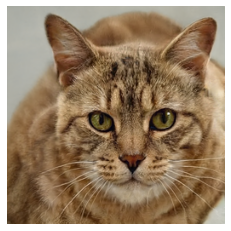

In [226]:
#36748
j = 9857
x = mems_aug_cats[j].copy()
x = x.reshape((1,14,512))
out = generator.synthesis_network(x)
img = convert_images_to_uint8(out, nchw_to_nhwc=True, uint8_cast=True)
img = img.numpy()[0]
sample = load_image(img)
sample = sample.reshape((1,224,224,3))
#x = assessor_1.predict(sample)[0]
#print(nn[j])
#img = load_image(img)
plt.imshow(img)
plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

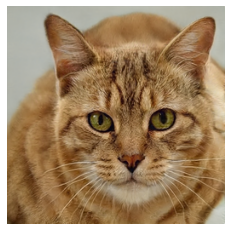

In [237]:
x = mems_aug_cats[j].copy() +6 * w
x = x.reshape((1,14,512))
out = generator.synthesis_network(x)
img = convert_images_to_uint8(out, nchw_to_nhwc=True, uint8_cast=True)
img = img.numpy()[0]
#sample = load_image(img)
#sample = sample.reshape((1,224,224,3))
#x = assessor_1.predict(sample)[0]
#print(neg_3[j])
#img = load_image(img)
plt.imshow(img)
plt.axis('off')

In [174]:
print(neg_3[j])
print(neg_2[j])
print(neg_1[j])
print(nn[j])
print(pos_1[j])
print(pos_2[j])
print(pos_3[j])

[0.7939965]
[0.796522]
[0.8165942]
[0.81348926]
[0.8441935]
[0.8659747]
[0.8869102]


In [104]:
w = w/np.linalg.norm(w)

In [110]:
for i in range(5000):
    
    dlatents = mems_aug_cats[i].copy()
    
    x = (dlatents - 15 * w).reshape((1,14,512))
    out = generator.synthesis_network(x)
    img = convert_images_to_uint8(out, nchw_to_nhwc=True, uint8_cast=True)
    img = img.numpy()[0]
    save_image(img,"/imaging-beast/myounesi/cats/neg3/"+str(i)+".png")
    
    x = (dlatents - 10 * w).reshape((1,14,512))
    out = generator.synthesis_network(x)
    img = convert_images_to_uint8(out, nchw_to_nhwc=True, uint8_cast=True)
    img = img.numpy()[0]
    save_image(img,"/imaging-beast/myounesi/cats/neg2/"+str(i)+".png")
    
    x = (dlatents - 5 * w).reshape((1,14,512))
    out = generator.synthesis_network(x)
    img = convert_images_to_uint8(out, nchw_to_nhwc=True, uint8_cast=True)
    img = img.numpy()[0]
    save_image(img,"/imaging-beast/myounesi/cats/neg1/"+str(i)+".png")
    
    x = (dlatents).reshape((1,14,512))
    out = generator.synthesis_network(x)
    img = convert_images_to_uint8(out, nchw_to_nhwc=True, uint8_cast=True)
    img = img.numpy()[0]
    save_image(img,"/imaging-beast/myounesi/cats/neutral/"+str(i)+".png")
    
    x = (dlatents + 5 * w).reshape((1,14,512))
    out = generator.synthesis_network(x)
    img = convert_images_to_uint8(out, nchw_to_nhwc=True, uint8_cast=True)
    img = img.numpy()[0]
    save_image(img,"/imaging-beast/myounesi/cats/pos1/"+str(i)+".png")
    
    x = (dlatents +10 * w).reshape((1,14,512))
    out = generator.synthesis_network(x)
    img = convert_images_to_uint8(out, nchw_to_nhwc=True, uint8_cast=True)
    img = img.numpy()[0]
    save_image(img,"/imaging-beast/myounesi/cats/pos2/"+str(i)+".png")
    
    x = (dlatents + 15 * w).reshape((1,14,512))
    out = generator.synthesis_network(x)
    img = convert_images_to_uint8(out, nchw_to_nhwc=True, uint8_cast=True)
    img = img.numpy()[0]
    save_image(img,"/imaging-beast/myounesi/cats/pos3/"+str(i)+".png")


    if i%500 == 0:
        print(i)

0
500
1000
1500
2000
2500
3000
3500
4000
4500


In [111]:
pos1 = np.load('/imaging-beast/myounesi/cats/pos1.npy')
pos2 = np.load('/imaging-beast/myounesi/cats/pos2.npy')
pos3 = np.load('/imaging-beast/myounesi/cats/pos3.npy')
neg1 = np.load('/imaging-beast/myounesi/cats/neg1.npy')
neg2 = np.load('/imaging-beast/myounesi/cats/neg2.npy')
neg3 = np.load('/imaging-beast/myounesi/cats/neg3.npy')
neutral = np.load('/imaging-beast/myounesi/cats/neutral.npy')

print("Pos1: " + str(np.mean(pos1)))
print("Pos2: " + str(np.mean(pos2)))
print("Pos3: " + str(np.mean(pos3)))
print("Neg1: " + str(np.mean(neg1)))
print("Neg2: " + str(np.mean(neg2)))
print("Neg3: " + str(np.mean(neg3)))

print("Neutral: " + str(np.mean(neutral)))

Pos1: 0.8446109
Pos2: 0.86111563
Pos3: 0.8742124
Neg1: 0.80617255
Neg2: 0.7888517
Neg3: 0.77361023
Neutral: 0.82553494


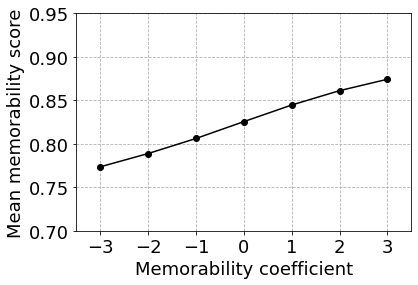

In [187]:
plt.plot([-3,-2,-1,0,1,2,3], [np.mean(neg3),np.mean(neg2),np.mean(neg1),np.mean(neutral),np.mean(pos1),np.mean(pos2),np.mean(pos3)],marker='o',color='black')

plt.xlabel('Memorability coefficient',fontsize=18)
plt.xlim((-3.5,+3.5))
plt.ylim((0.7,0.95))
plt.grid(linestyle='--')
plt.ylabel('Mean memorability score',fontsize=18)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.show()

/home/myounes9/.conda/envs/tfg25/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

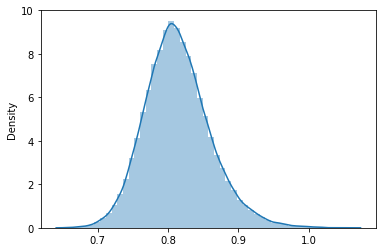

In [119]:
import seaborn as sns

sns.distplot(mems_1)

## Cats z

In [174]:
X_train, X_test, y_train_1, y_test_1 = train_test_split(lats, y_1, test_size=0.1, random_state=42)
clf = LogisticRegression(max_iter=4000, verbose=1).fit(X_train, y_train_1)

/home/myounes9/.conda/envs/tfg25/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          513     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.23826D+04    |proj g|=  2.87106D+03


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  513      6      7      1     0     0   5.447D-03   5.341D+04
  F =   53408.538444098718     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [175]:
pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test_1, pred))

Accuracy: 0.6788


In [176]:
w = clf.coef_[0]
np.save('w_512_cats.npy', w)

[0.8179963]


(-0.5, 255.5, 255.5, -0.5)

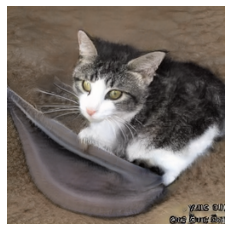

In [178]:
x = X_train[88].copy()
x = x.reshape((1,512))
out = generator(x)
img = convert_images_to_uint8(out, nchw_to_nhwc=True, uint8_cast=True)
img = img.numpy()[0]
sample = load_image(img)
sample = sample.reshape((1,224,224,3))
x = assessor_1.predict(sample)[0]
print(x)
#img = load_image(img)
plt.imshow(img)
plt.axis('off')

[0.9893489]


(-0.5, 255.5, 255.5, -0.5)

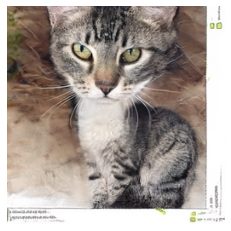

In [191]:
x = X_train[88].copy() +3 * w
x = x.reshape((1,512))
out = generator(x)
img = convert_images_to_uint8(out, nchw_to_nhwc=True, uint8_cast=True)
img = img.numpy()[0]
sample = load_image(img)
sample = sample.reshape((1,224,224,3))
x = assessor_1.predict(sample)[0]
print(x)
#img = load_image(img)
plt.imshow(img)
plt.axis('off')

## Horses w

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

mems_1 = mem_horse_1
mems_aug_cats = np.load('lats_aug_horses.npy')
lats = np.load('lats_horses_512.npy')

mean_1 = np.mean(mems_1)
y_1 = np.ones_like(mems_1)
y_1[mems_1<mean_1] = 0

X_train, X_test, y_train_1, y_test_1 = train_test_split(mems_aug_cats, y_1, test_size=0.1, random_state=42)
clf = LogisticRegression(max_iter=4000, verbose=1).fit(X_train, y_train_1)

/home/myounes9/.conda/envs/tfg/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  8.5min finished


In [98]:
#fine_tune
#mean

from sklearn import metrics

pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test_1, pred))
w = clf.coef_[0]
np.save('w_aug_horses_mem_ft.npy', w)

Accuracy: 0.8601


/home/myounes9/.conda/envs/tfg/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

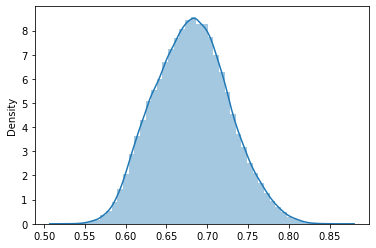

In [99]:
import seaborn as sns
sns.distplot(mems_1)

In [195]:
from sklearn import metrics

pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test_1, pred))
w = clf.coef_[0]
np.save('w_aug_horses1.npy', w)

Accuracy: 0.8109


In [190]:
#memnet

from sklearn import metrics

pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test_1, pred))
w = clf.coef_[0]
np.save('w_aug_horses_mem.npy', w)

Accuracy: 0.8897


In [213]:
w = np.load('w_aug_horses1.npy')

In [100]:
w = w/np.linalg.norm(w)

In [191]:
np.linalg.norm(w)

1.3932130549643345

(-0.5, 255.5, 255.5, -0.5)

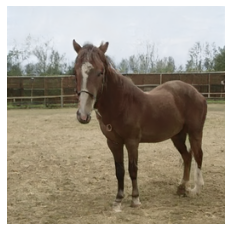

In [171]:
x = mems_aug_cats[988].copy()
x = x.reshape((1,14,512))
out = generator.synthesis_network(x)
img = convert_images_to_uint8(out, nchw_to_nhwc=True, uint8_cast=True)
img = img.numpy()[0]
sample = load_image(img)
sample = sample.reshape((1,224,224,3))
#x = assessor_1.predict(sample)[0]
#print(x)
#img = load_image(img)
plt.imshow(img)
plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

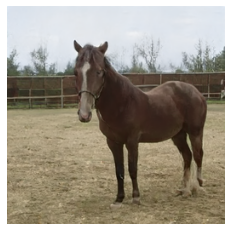

In [179]:
x = mems_aug_cats[988].copy() -4 * w
x = x.reshape((1,14,512))
out = generator.synthesis_network(x)
img = convert_images_to_uint8(out, nchw_to_nhwc=True, uint8_cast=True)
img = img.numpy()[0]
sample = load_image(img)
sample = sample.reshape((1,224,224,3))
#x = assessor_1.predict(sample)[0]
#print(x)
#img = load_image(img)
plt.imshow(img)
plt.axis('off')

In [211]:
for i in range(5000):
    
    dlatents = mems_aug_cats[i].copy()
    
    x = (dlatents - 15 * w).reshape((1,14,512))
    out = generator.synthesis_network(x)
    img = convert_images_to_uint8(out, nchw_to_nhwc=True, uint8_cast=True)
    img = img.numpy()[0]
    save_image(img,"/imaging-beast/myounesi/horses/neg3/"+str(i)+".png")
    
    x = (dlatents - 10 * w).reshape((1,14,512))
    out = generator.synthesis_network(x)
    img = convert_images_to_uint8(out, nchw_to_nhwc=True, uint8_cast=True)
    img = img.numpy()[0]
    save_image(img,"/imaging-beast/myounesi/horses/neg2/"+str(i)+".png")
    
    x = (dlatents - 5 * w).reshape((1,14,512))
    out = generator.synthesis_network(x)
    img = convert_images_to_uint8(out, nchw_to_nhwc=True, uint8_cast=True)
    img = img.numpy()[0]
    save_image(img,"/imaging-beast/myounesi/horses/neg1/"+str(i)+".png")
    
    x = (dlatents).reshape((1,14,512))
    out = generator.synthesis_network(x)
    img = convert_images_to_uint8(out, nchw_to_nhwc=True, uint8_cast=True)
    img = img.numpy()[0]
    save_image(img,"/imaging-beast/myounesi/horses/neutral/"+str(i)+".png")
    
    x = (dlatents + 5 * w).reshape((1,14,512))
    out = generator.synthesis_network(x)
    img = convert_images_to_uint8(out, nchw_to_nhwc=True, uint8_cast=True)
    img = img.numpy()[0]
    save_image(img,"/imaging-beast/myounesi/horses/pos1/"+str(i)+".png")
    
    x = (dlatents +10 * w).reshape((1,14,512))
    out = generator.synthesis_network(x)
    img = convert_images_to_uint8(out, nchw_to_nhwc=True, uint8_cast=True)
    img = img.numpy()[0]
    save_image(img,"/imaging-beast/myounesi/horses/pos2/"+str(i)+".png")
    
    x = (dlatents + 15 * w).reshape((1,14,512))
    out = generator.synthesis_network(x)
    img = convert_images_to_uint8(out, nchw_to_nhwc=True, uint8_cast=True)
    img = img.numpy()[0]
    save_image(img,"/imaging-beast/myounesi/horses/pos3/"+str(i)+".png")


    if i%500 == 0:
        print(i)

0
500
1000
1500
2000
2500
3000
3500
4000
4500


In [212]:
pos1 = np.load('/imaging-beast/myounesi/horses/pos1.npy')
pos2 = np.load('/imaging-beast/myounesi/horses/pos2.npy')
pos3 = np.load('/imaging-beast/myounesi/horses/pos3.npy')
neg1 = np.load('/imaging-beast/myounesi/horses/neg1.npy')
neg2 = np.load('/imaging-beast/myounesi/horses/neg2.npy')
neg3 = np.load('/imaging-beast/myounesi/horses/neg3.npy')
neutral = np.load('/imaging-beast/myounesi/horses/neutral.npy')

print("Pos1: " + str(np.mean(pos1)))
print("Pos2: " + str(np.mean(pos2)))
print("Pos3: " + str(np.mean(pos3)))
print("Neg1: " + str(np.mean(neg1)))
print("Neg2: " + str(np.mean(neg2)))
print("Neg3: " + str(np.mean(neg3)))

print("Neutral: " + str(np.mean(neutral)))

Pos1: 0.79125047
Pos2: 0.80589646
Pos3: 0.8166664
Neg1: 0.7528565
Neg2: 0.7348193
Neg3: 0.7199209
Neutral: 0.77286047


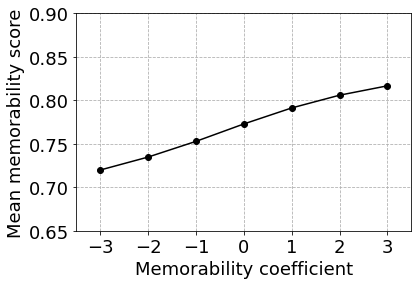

In [213]:
plt.plot([-3,-2,-1,0,1,2,3], [np.mean(neg3),np.mean(neg2),np.mean(neg1),np.mean(neutral),np.mean(pos1),np.mean(pos2),np.mean(pos3)],marker='o',color='black')

plt.xlabel('Memorability coefficient',fontsize=18)
plt.xlim((-3.5,+3.5))
plt.ylim((0.65,0.9))
plt.grid(linestyle='--')
plt.ylabel('Mean memorability score',fontsize=18)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.show()

[0.8041045]


(-0.5, 255.5, 255.5, -0.5)

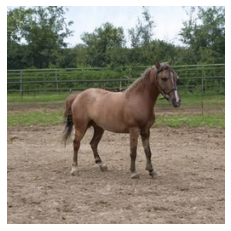

In [258]:
#36748
j = 514
x = mems_aug_cats[j].copy()
x = x.reshape((1,14,512))
out = generator.synthesis_network(x)
img = convert_images_to_uint8(out, nchw_to_nhwc=True, uint8_cast=True)
img = img.numpy()[0]
sample = load_image(img)
sample = sample.reshape((1,224,224,3))
#x = assessor_1.predict(sample)[0]
print(nn[j])
#img = load_image(img)
plt.imshow(img)
plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

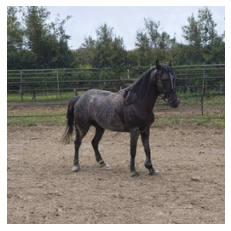

In [265]:
x = mems_aug_cats[j].copy() -15 * w
x = x.reshape((1,14,512))
out = generator.synthesis_network(x)
img = convert_images_to_uint8(out, nchw_to_nhwc=True, uint8_cast=True)
img = img.numpy()[0]
#sample = load_image(img)
#sample = sample.reshape((1,224,224,3))
#x = assessor_1.predict(sample)[0]
#print(neg_3[j])
#img = load_image(img)
plt.imshow(img)
plt.axis('off')

In [259]:
print(neg_3[j])
print(neg_2[j])
print(neg_1[j])
print(nn[j])
print(pos_1[j])
print(pos_2[j])
print(pos_3[j])

[0.74197143]
[0.75452477]
[0.78335524]
[0.8041045]
[0.8263123]
[0.8277565]
[0.8380356]


## Horses z

## Cars w

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

mems_1 = mem_car_1
mems_aug_cats = np.load('lats_aug_cars.npy')
lats = np.load('lats_cars_512.npy')

mean_1 = np.median(mems_1)
y_1 = np.ones_like(mems_1)
y_1[mems_1<mean_1] = 0

X_train, X_test, y_train_1, y_test_1 = train_test_split(mems_aug_cats, y_1, test_size=0.1, random_state=42)
clf = LogisticRegression(max_iter=4000, verbose=1).fit(X_train, y_train_1)

/home/myounes9/.conda/envs/tfg/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  6.9min finished


In [18]:
#fine_tune
#mean

from sklearn import metrics

pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test_1, pred))
w1 = clf.coef_[0]
np.save('w_aug_cars_ft_mean.npy', w1)

Accuracy: 0.8139


In [24]:
#fine_tune
#median

pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test_1, pred))
w2 = clf.coef_[0]
np.save('w_aug_cars_ft_median.npy', w2)

Accuracy: 0.7785


/home/myounes9/.conda/envs/tfg/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

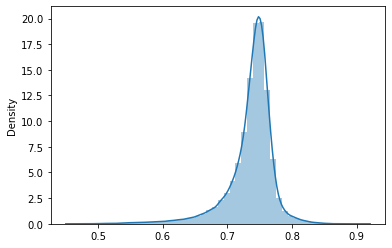

In [22]:
import seaborn as sns

%matplotlib inline
sns.distplot(mem_car_1)

In [240]:
from sklearn import metrics

pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test_1, pred))
w = clf.coef_[0]
np.save('w_aug_cars1.npy', w)

Accuracy: 0.7825


In [267]:
#memnet
from sklearn import metrics

pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test_1, pred))
w = clf.coef_[0]
np.save('w_aug_cars_mem.npy', w)

Accuracy: 0.8581


In [25]:
w1 = w1/np.linalg.norm(w1)
w2 = w2/np.linalg.norm(w2)

(-0.5, 511.5, 383.5, -0.5)

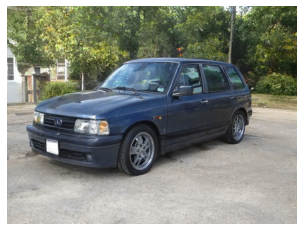

In [87]:
x = X_train[1027].copy() 
x = x.reshape((1,16,512))
out = generator.synthesis_network(x)
img = convert_images_to_uint8(out, nchw_to_nhwc=True, uint8_cast=True)
img = img.numpy()[0][64:448]
sample = load_image(img)
sample = sample.reshape((1,224,224,3))
#x = assessor_1.predict(sample)[0]
#print(x)
#img = load_image(img)
plt.imshow(img)
plt.axis('off')

(-0.5, 511.5, 383.5, -0.5)

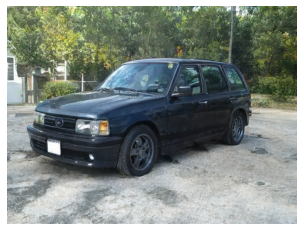

In [95]:
x = X_train[1027].copy() -7*w1
x = x.reshape((1,16,512))
out = generator.synthesis_network(x)
img = convert_images_to_uint8(out, nchw_to_nhwc=True, uint8_cast=True)
img = img.numpy()[0][64:448]
sample = load_image(img)
sample = sample.reshape((1,224,224,3))
#x = assessor_1.predict(sample)[0]
#print(x)
#img = load_image(img)
plt.imshow(img)
plt.axis('off')

In [283]:
for i in range(5000):
    
    dlatents = mems_aug_cats[i].copy()
    
    x = (dlatents - 12 * w).reshape((1,16,512))
    out = generator.synthesis_network(x)
    img = convert_images_to_uint8(out, nchw_to_nhwc=True, uint8_cast=True)
    img = img.numpy()[0][64:448]
    save_image(img,"/imaging-beast/myounesi/cars/neg3/"+str(i)+".png")
    
    x = (dlatents - 8 * w).reshape((1,16,512))
    out = generator.synthesis_network(x)
    img = convert_images_to_uint8(out, nchw_to_nhwc=True, uint8_cast=True)
    img = img.numpy()[0][64:448]
    save_image(img,"/imaging-beast/myounesi/cars/neg2/"+str(i)+".png")
    
    x = (dlatents - 4 * w).reshape((1,16,512))
    out = generator.synthesis_network(x)
    img = convert_images_to_uint8(out, nchw_to_nhwc=True, uint8_cast=True)
    img = img.numpy()[0][64:448]
    save_image(img,"/imaging-beast/myounesi/cars/neg1/"+str(i)+".png")
    
    x = (dlatents).reshape((1,16,512))
    out = generator.synthesis_network(x)
    img = convert_images_to_uint8(out, nchw_to_nhwc=True, uint8_cast=True)
    img = img.numpy()[0][64:448]
    save_image(img,"/imaging-beast/myounesi/cars/neutral/"+str(i)+".png")
    
    x = (dlatents + 7 * w).reshape((1,16,512))
    out = generator.synthesis_network(x)
    img = convert_images_to_uint8(out, nchw_to_nhwc=True, uint8_cast=True)
    img = img.numpy()[0][64:448]
    save_image(img,"/imaging-beast/myounesi/cars/pos1/"+str(i)+".png")
    
    x = (dlatents +14 * w).reshape((1,16,512))
    out = generator.synthesis_network(x)
    img = convert_images_to_uint8(out, nchw_to_nhwc=True, uint8_cast=True)
    img = img.numpy()[0][64:448]
    save_image(img,"/imaging-beast/myounesi/cars/pos2/"+str(i)+".png")
    
    x = (dlatents + 21 * w).reshape((1,16,512))
    out = generator.synthesis_network(x)
    img = convert_images_to_uint8(out, nchw_to_nhwc=True, uint8_cast=True)
    img = img.numpy()[0][64:448]
    save_image(img,"/imaging-beast/myounesi/cars/pos3/"+str(i)+".png")


    if i%500 == 0:
        print(i)

0
500
1000
1500
2000
2500
3000
3500
4000
4500


In [284]:
pos1 = np.load('/imaging-beast/myounesi/cars/pos1.npy')
pos2 = np.load('/imaging-beast/myounesi/cars/pos2.npy')
pos3 = np.load('/imaging-beast/myounesi/cars/pos3.npy')
neg1 = np.load('/imaging-beast/myounesi/cars/neg1.npy')
neg2 = np.load('/imaging-beast/myounesi/cars/neg2.npy')
neg3 = np.load('/imaging-beast/myounesi/cars/neg3.npy')
neutral = np.load('/imaging-beast/myounesi/cars/neutral.npy')

print("Pos1: " + str(np.mean(pos1)))
print("Pos2: " + str(np.mean(pos2)))
print("Pos3: " + str(np.mean(pos3)))
print("Neg1: " + str(np.mean(neg1)))
print("Neg2: " + str(np.mean(neg2)))
print("Neg3: " + str(np.mean(neg3)))

print("Neutral: " + str(np.mean(neutral)))

Pos1: 0.82998514
Pos2: 0.8442292
Pos3: 0.8540703
Neg1: 0.78816086
Neg2: 0.7637737
Neg3: 0.7350373
Neutral: 0.80696887


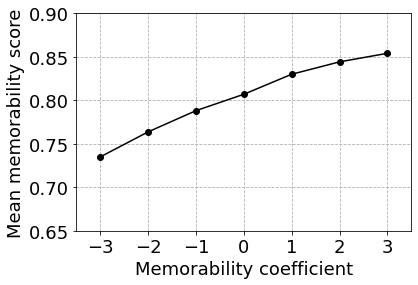

In [285]:
plt.plot([-3,-2,-1,0,1,2,3], [np.mean(neg3),np.mean(neg2),np.mean(neg1),np.mean(neutral),np.mean(pos1),np.mean(pos2),np.mean(pos3)],marker='o',color='black')

plt.xlabel('Memorability coefficient',fontsize=18)
plt.xlim((-3.5,+3.5))
plt.ylim((0.65,0.9))
plt.grid(linestyle='--')
plt.ylabel('Mean memorability score',fontsize=18)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.show()

[0.8353958]


(-0.5, 511.5, 383.5, -0.5)

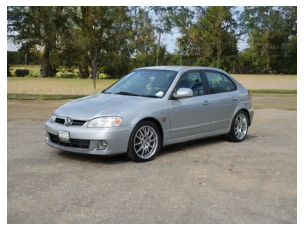

In [363]:
#36748
j = 4034
x = mems_aug_cats[j].copy()
x = x.reshape((1,16,512))
out = generator.synthesis_network(x)
img = convert_images_to_uint8(out, nchw_to_nhwc=True, uint8_cast=True)
img = img.numpy()[0][64:448]
#sample = load_image(img)
#sample = sample.reshape((1,224,224,3))
#x = assessor_1.predict(sample)[0]
print(nn[j])
#img = load_image(img)
plt.imshow(img)
plt.axis('off')

(-0.5, 511.5, 383.5, -0.5)

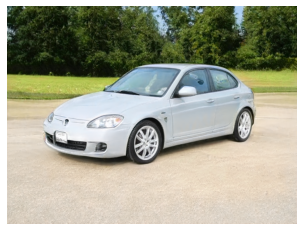

In [372]:
x = mems_aug_cats[j].copy() +21 * w
x = x.reshape((1,16,512))
out = generator.synthesis_network(x)
img = convert_images_to_uint8(out, nchw_to_nhwc=True, uint8_cast=True)
img = img.numpy()[0][64:448]
#sample = load_image(img)
#sample = sample.reshape((1,224,224,3))
#x = assessor_1.predict(sample)[0]
#print(neg_3[j])
#img = load_image(img)
plt.imshow(img)
plt.axis('off')

In [373]:
print(neg_3[j])
print(neg_2[j])
print(neg_1[j])
print(nn[j])
print(pos_1[j])
print(pos_2[j])
print(pos_3[j])

[0.7982427]
[0.8213042]
[0.82957625]
[0.8353958]
[0.84700966]
[0.8576752]
[0.86010945]


## Cars z

## Church w

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

mems_1 = mem_church_1
mems_aug_cats = np.load('lats_aug_churches.npy')
lats = np.load('lats_churches_512.npy')

mean_1 = np.mean(mems_1)
y_1 = np.ones_like(mems_1)
y_1[mems_1<mean_1] = 0

X_train, X_test, y_train_1, y_test_1 = train_test_split(mems_aug_cats, y_1, test_size=0.1, random_state=42)
#clf = LogisticRegression(max_iter=4000, verbose=1).fit(X_train, y_train_1)

NameError: name 'mem_church_1' is not defined

In [276]:
from sklearn import metrics

pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test_1, pred))
w = clf.coef_[0]
np.save('w_aug_churches1.npy', w)

Accuracy: 0.8846


In [26]:
w = np.load('w_aug_cars1.npy')

In [375]:
pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test_1, pred))
w = clf.coef_[0]
np.save('w_aug_churches_mem.npy', w)

Accuracy: 0.8325


[0.7545543]


(-0.5, 511.5, 511.5, -0.5)

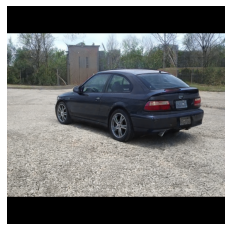

In [27]:
#771
#3003

%matplotlib inline
seed = 909
rnd = np.random.RandomState(seed)
z = rnd.randn(1, 512).astype('float32')
#z = np.random.rand(1,512)
dlatents = generator.mapping_network(z)
dlatents = w_average + (dlatents - w_average) * 0.5
out = generator.synthesis_network(dlatents)
img = convert_images_to_uint8(out, nchw_to_nhwc=True, uint8_cast=True)
img = img.numpy()[0]
sample = load_image(img)
sample = sample.reshape((1,224,224,3))
x = assessor_1.predict(sample)[0]
print(x)
#img = load_image(img)
plt.imshow(img)
plt.axis('off')

In [13]:
w.shape

(7168,)

[0.8270355]


(-0.5, 511.5, 511.5, -0.5)

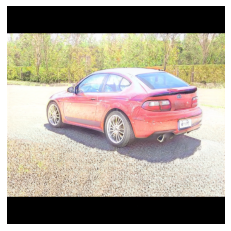

In [33]:
x = np.ravel(np.array(dlatents)) +30 * w
x = x.reshape((1,16,512))
out = generator.synthesis_network(x)
img = convert_images_to_uint8(out, nchw_to_nhwc=True, uint8_cast=True)
img = img.numpy()[0]
sample = load_image(img)
sample = sample.reshape((1,224,224,3))
x = assessor_1.predict(sample)[0]
print(x)
#img = load_image(img)
plt.imshow(img)
plt.axis('off')

In [420]:
for i in range(5000):
    
    dlatents = mems_aug_cats[i].copy()
    
    x = (dlatents - 15 * w).reshape((1,14,512))
    out = generator.synthesis_network(x)
    img = convert_images_to_uint8(out, nchw_to_nhwc=True, uint8_cast=True)
    img = img.numpy()[0]
    save_image(img,"/imaging-beast/myounesi/churches/neg3/"+str(i)+".png")
    
    x = (dlatents - 10 * w).reshape((1,14,512))
    out = generator.synthesis_network(x)
    img = convert_images_to_uint8(out, nchw_to_nhwc=True, uint8_cast=True)
    img = img.numpy()[0]
    save_image(img,"/imaging-beast/myounesi/churches/neg2/"+str(i)+".png")
    
    x = (dlatents - 5 * w).reshape((1,14,512))
    out = generator.synthesis_network(x)
    img = convert_images_to_uint8(out, nchw_to_nhwc=True, uint8_cast=True)
    img = img.numpy()[0]
    save_image(img,"/imaging-beast/myounesi/churches/neg1/"+str(i)+".png")
    
    x = (dlatents).reshape((1,14,512))
    out = generator.synthesis_network(x)
    img = convert_images_to_uint8(out, nchw_to_nhwc=True, uint8_cast=True)
    img = img.numpy()[0]
    save_image(img,"/imaging-beast/myounesi/churches/neutral/"+str(i)+".png")
    
    x = (dlatents + 7 * w).reshape((1,14,512))
    out = generator.synthesis_network(x)
    img = convert_images_to_uint8(out, nchw_to_nhwc=True, uint8_cast=True)
    img = img.numpy()[0]
    save_image(img,"/imaging-beast/myounesi/churches/pos1/"+str(i)+".png")
    
    x = (dlatents +14 * w).reshape((1,14,512))
    out = generator.synthesis_network(x)
    img = convert_images_to_uint8(out, nchw_to_nhwc=True, uint8_cast=True)
    img = img.numpy()[0]
    save_image(img,"/imaging-beast/myounesi/churches/pos2/"+str(i)+".png")
    
    x = (dlatents + 21 * w).reshape((1,14,512))
    out = generator.synthesis_network(x)
    img = convert_images_to_uint8(out, nchw_to_nhwc=True, uint8_cast=True)
    img = img.numpy()[0]
    save_image(img,"/imaging-beast/myounesi/churches/pos3/"+str(i)+".png")


    if i%500 == 0:
        print(i)

0
500
1000
1500
2000
2500
3000
3500
4000
4500


In [422]:
pos1 = np.load('/imaging-beast/myounesi/churches/pos1.npy')
pos2 = np.load('/imaging-beast/myounesi/churches/pos2.npy')
pos3 = np.load('/imaging-beast/myounesi/churches/pos3.npy')
neg1 = np.load('/imaging-beast/myounesi/churches/neg1.npy')
neg2 = np.load('/imaging-beast/myounesi/churches/neg2.npy')
neg3 = np.load('/imaging-beast/myounesi/churches/neg3.npy')
neutral = np.load('/imaging-beast/myounesi/churches/neutral.npy')

print("Pos1: " + str(np.mean(pos1)))
print("Pos2: " + str(np.mean(pos2)))
print("Pos3: " + str(np.mean(pos3)))
print("Neg1: " + str(np.mean(neg1)))
print("Neg2: " + str(np.mean(neg2)))
print("Neg3: " + str(np.mean(neg3)))

print("Neutral: " + str(np.mean(neutral)))

Pos1: 0.6507645
Pos2: 0.6754252
Pos3: 0.69734377
Neg1: 0.6084634
Neg2: 0.5945574
Neg3: 0.5846087
Neutral: 0.6249794


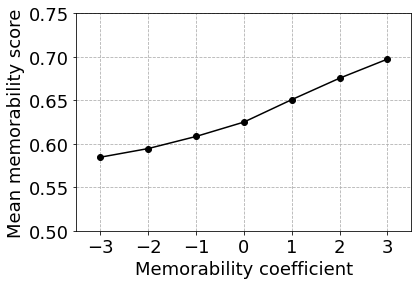

In [429]:
plt.plot([-3,-2,-1,0,1,2,3], [np.mean(neg3),np.mean(neg2),np.mean(neg1),np.mean(neutral),np.mean(pos1),np.mean(pos2),np.mean(pos3)],marker='o',color='black')

plt.xlabel('Memorability coefficient',fontsize=18)
plt.xlim((-3.5,+3.5))
plt.ylim((0.50,0.75))
plt.grid(linestyle='--')
plt.ylabel('Mean memorability score',fontsize=18)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.show()

[0.5498049]
[0.65524876]


(-0.5, 255.5, 255.5, -0.5)

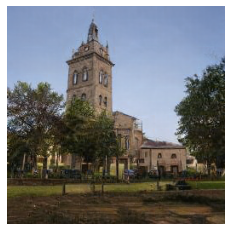

In [506]:
#36748
j = 2017
x = mems_aug_cats[j].copy()
x = x.reshape((1,14,512))
out = generator.synthesis_network(x)
img = convert_images_to_uint8(out, nchw_to_nhwc=True, uint8_cast=True)
img = img.numpy()[0]
sample = load_image(img)
sample = sample.reshape((1,224,224,3))
x = assessor_1.predict(sample)[0]
print(nn[j])
print(x)
#img = load_image(img)
plt.imshow(img)
plt.axis('off')

[0.65524876]


(-0.5, 255.5, 255.5, -0.5)

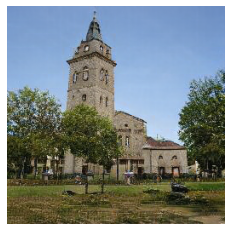

In [514]:
x = mems_aug_cats[j].copy() +21 * w
x = x.reshape((1,14,512))
out = generator.synthesis_network(x)
img = convert_images_to_uint8(out, nchw_to_nhwc=True, uint8_cast=True)
img = img.numpy()[0]
sample = load_image(img)
sample = sample.reshape((1,224,224,3))
x = assessor_1.predict(sample)[0]
print(x)
#img = load_image(img)
plt.imshow(img)
plt.axis('off')

In [507]:
print(neg_3[j])
print(neg_2[j])
print(neg_1[j])
print(nn[j])
print(pos_1[j])
print(pos_2[j])
print(pos_3[j])

[0.5130534]
[0.5344061]
[0.5488735]
[0.5498049]
[0.5964783]
[0.63980323]
[0.66295373]


## Church z

In [79]:
mem1 = np.load('mems_cars.npy')
mem2 = mem_car_1

0.8137879
0.046631556


/home/myounes9/.conda/envs/tfg25/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

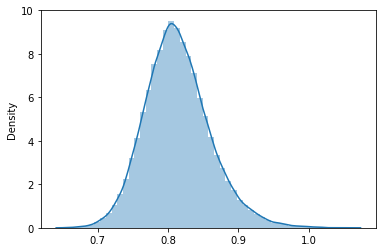

In [73]:
print(np.mean(mem1))
print(np.std(mem1))

sns.distplot(mem1)

0.8256473
0.039982107


/home/myounes9/.conda/envs/tfg25/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

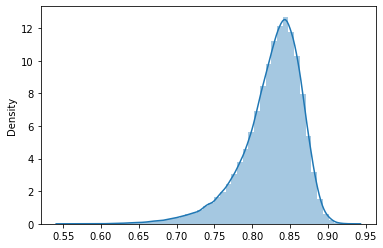

In [74]:
print(np.mean(mem2))
print(np.std(mem2))

sns.distplot(mem2)

In [77]:
mem2.shape

(99999, 1)

In [76]:
mem2 = np.delete(mem2, 50000, 0)

In [80]:
from scipy.stats import spearmanr
coef, p = spearmanr(np.array(mem1), mem2)
print(coef)

0.5753409314258511


In [414]:
from scipy.stats import rankdata

rank_1 = rankdata(mem1)
rank_2 = rankdata(mem2)

In [415]:
from scipy import stats

sp1 = stats.spearmanr(rank_1, rank_2)
kt1 = stats.kendalltau(rank_1, rank_2)


print("SP and kt for the first assessor: ")
print(sp1)
print(kt1)

SP and kt for the first assessor: 
SpearmanrResult(correlation=0.0002488832669169058, pvalue=0.9372693178776452)
KendalltauResult(correlation=0.00016696788909777602, pvalue=0.9368751322827089)


TypeError: Image data of dtype <U42 cannot be converted to float

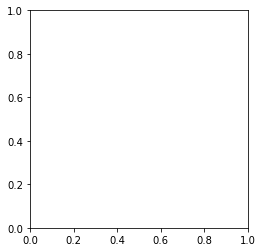

In [416]:
plt.imshow('/imaging-beast/myounesi/cat_samples/10.png')

In [15]:
import os

root_1 = os.listdir("/imaging-beast/myounesi/church_samples/")
root_2 = os.listdir("/imaging-beast/myounesi/car_samples/")
root_3 = os.listdir("/imaging-beast/myounesi/cat_samples/")
root_4 = os.listdir("/imaging-beast/myounesi/horse_samples/")
print(root_1[:6])
print(root_2[:6])
print(root_3[:6])
print(root_4[:6])

['33488.png', '24099.png', '65473.png', '72159.png', '1464.png', '46802.png']
['33488.png', '24099.png', '65473.png', '72159.png', '1464.png', '46802.png']
['33488.png', '24099.png', '65473.png', '72159.png', '1464.png', '46802.png']
['33488.png', '24099.png', '65473.png', '72159.png', '1464.png', '46802.png']


In [16]:
mem_cat = np.load("/home/myounes9/memcat_prjct/Memnet-Pytorch/cats_ft_mems.npy")
#mem_church = np.load("/home/myounes9/memcat_prjct/Memnet-Pytorch/church_100k.npy")
mem_car = np.load("/home/myounes9/memcat_prjct/Memnet-Pytorch/cars_ft_mems.npy")
mem_horse = np.load("/home/myounes9/memcat_prjct/Memnet-Pytorch/horses_ft_mems.npy")

mem_cat_1 = np.zeros_like(mem_cat)
#mem_church_1 = np.zeros_like(mem_church)
mem_car_1 = np.zeros_like(mem_car)
mem_horse_1 = np.zeros_like(mem_horse)

for i in range(100000):
    mem_cat_1[int(root_1[i][:-4])] = mem_cat[i]
    mem_car_1[int(root_1[i][:-4])] = mem_car[i]
    #mem_church_1[int(root_1[i][:-4])] = mem_church[i]
    mem_horse_1[int(root_1[i][:-4])] = mem_horse[i]

In [8]:
import pandas as pd

csv_file = "/imaging/myounesi/memcat/MemCat_data/memcat_image_data.csv"
obj_ds = pd.read_csv(csv_file)

In [14]:
obj_ds.iloc[9000]

Unnamed: 0                                      9001
image_file                       n03790512_14100.jpg
category                                     vehicle
subcategory                               motorcycle
current_height                                 375.0
current_width                                  500.0
source                                      imagenet
searched_label                      motorcycle, bike
resize_factor                                    1.0
H                                                 58
FA                                                 5
n_resp                                            85
memorability_wo_fa_correction               0.682353
memorability_w_fa_correction                0.623529
Name: 9000, dtype: object

In [427]:
pos_1 = np.zeros_like(pos1)
pos_2 = np.zeros_like(pos1)
pos_3 = np.zeros_like(pos1)
neg_1 = np.zeros_like(pos1)
neg_2 = np.zeros_like(pos1)
neg_3 = np.zeros_like(pos1)
nn = np.zeros_like(pos1)

root_1 = os.listdir('/imaging-beast/myounesi/churches/neutral/')


for i in range(5000):
    pos_1[int(root_1[i][:-4])] = pos1[i]
    pos_2[int(root_1[i][:-4])] = pos2[i]
    pos_3[int(root_1[i][:-4])] = pos3[i]
    
    neg_1[int(root_1[i][:-4])] = neg1[i]
    neg_2[int(root_1[i][:-4])] = neg2[i]
    neg_3[int(root_1[i][:-4])] = neg3[i]
    
    nn[int(root_1[i][:-4])] = neutral[i]


/home/myounes9/.conda/envs/tfg25/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

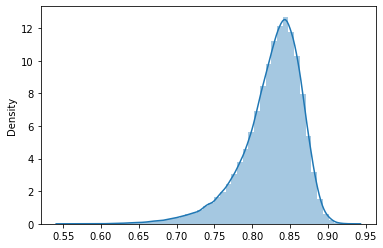